# Goal: To model the charge on electricity per unit for the United States.

### Deliverables
*** Results Required: *** 

* Feature Importance
* P-Value significance chart
* RMSE

### Outputs
* Feature Importance: Last Cell of the notebook
* P-Value significance: Second Last Cell of the notebook 
* Adjusted R^2 of *** 0.915 *** was obtained
* RMSE value of ***6.592152769e-09 *** which is a very small value and helps us make close predictions to the unseen data.
* The cross validation ***training score is : 0.91673760234*** while on testing it is: ***0.912066093352***

# Models Implemented
* Linear Regression
    * Multivariate Regression
    * Step Regression
* Random Forest

# Dependencies

In [1]:
'''
Libraries used
'''
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''
* Read dataset
* Remove the first no named column
* Adjust width for data view
* Drop 'Period Variable' as it is not a repetative feature.
'''

# df = pd.read_csv('data_690.csv')
df = pd.read_csv('linear_interpolated_data.csv')
# df = pd.read_csv('interpolated_data.csv') # cubic spline generated data

df = df.drop(['Unnamed: 0'], axis=1)
pd.set_option('display.max_columns', 70)
df = df.drop(['period'], axis=1)
df = df.drop(['for_wind__Power___193__V3__R2__Cp__in_watts'], axis=1)
df = df.drop(['for_solar__1367__kt__r__2__efficiency'], axis=1)
df.head()

,Year,Month,Net_generation_other_renewables_total__thousand_megawatthours,Average_retail_price_of_electricity_cents_per_KWH,Retail_sales_of_electricity_million_kilowatthours,Revenue_from_retail_sales_of_electricity_totalmillion_dollars,Revenue_from_retail_sales_of_electricity_residential_million_dollars,Total_consumption_coal_thousand_tons,Total_consumption_petroleum_liquid_thousand_barrels,Total_consumption__natural_gas_thousand_Mcf,unqid,kt_avg,T2M_avg,WS10M_avg,State,kt_max,T2M_max,WS10M_max,kt_min,T2M_min,WS10M_min,total_renewable_policy_count,Wind_policy_count,Solar_photovoltaic_policy_count,Electricity_Renew_No_Solar_Or_Wind_Unit_MWh,Charge_by_Department_dollars_per_MWh,Electricity_Consumed_Unit_MWh,Total_revenue_of_Retail_sales_electricity_in_million_dollars,Total_revenue_of_Retail_sales_Residential_in_million_dollars,Energy_produced_by_coal_thousand_tons_MWh,Energy_produced_by_petroleum_liquid_thousand_barrels_MWh,Energy_produced_by_natural_gas_thousand_MWh,for_wind_193_V3_R2_Cp_in_watts,for_solar_1367_kt_r_2_in_watts,Kg_CO2_emitted_from_Coal,Kg_CO2_emitted_from_Petrol,Kg_CO2_emitted_from_NaturalGas
0,2001,1,25.78400,6.01,250.60591,48.12840,15.07136,2317.575,4.739,228.521,2001_1_Wyoming,0.580634,7.877419,3.428387,Wyoming,0.79,20.49,7.33,0.21,0.05,0.78,38,3,2,25784.00,0.000060,250605.91,48128400.0,15071360.0,1.886738e+07,2788.620707,66.972894,400.732961,83.2503,7.706019e+05,1152.118210,4.134945e+04
1,2001,1,59.13588,7.53,4276.21487,727.44186,321.98899,4294.901,32.598,1093.509,2001_1_Illinois,0.496512,4.975000,3.038508,Illinois,0.79,16.24,5.95,0.07,0.00,0.57,93,13,16,59135.88,0.000075,4276214.87,727441860.0,321988990.0,3.496479e+07,19181.991516,320.475853,156.385263,27.7501,1.428070e+06,7925.036805,1.978636e+05
2,2001,1,5.11200,6.44,441.08794,62.82552,28.42055,986.528,0.485,1.770,2001_1_Montana,0.513096,6.872903,4.230335,Montana,0.76,18.65,10.94,0.17,0.01,0.69,48,13,14,5112.00,0.000064,441087.94,62825520.0,28420550.0,8.031324e+06,285.393763,0.518736,277.407711,67.3931,3.280240e+05,117.910389,3.202705e+02
3,2001,1,9.31800,6.71,1421.03141,214.82303,95.36042,1776.516,39.380,6023.636,2001_1_Colorado,0.586164,6.415760,3.230219,Colorado,0.81,20.49,9.25,0.06,0.01,0.88,134,18,47,9318.00,0.000067,1421031.41,214823030.0,95360420.0,1.446262e+07,23172.796672,1765.353449,575.465475,23.7858,5.906978e+05,9573.837333,1.089939e+06
4,2001,1,0.86562,5.87,3233.67091,365.03846,189.79038,3609.634,74.705,485.406,2001_1_Missouri,0.482445,3.415280,2.956570,Missouri,0.80,16.47,6.36,0.03,0.02,0.96,79,10,16,865.62,0.000059,3233670.91,365038460.0,189790380.0,2.938603e+07,43959.466109,142.258456,747.110700,11.8929,1.200216e+06,18161.846571,8.783120e+04


In [3]:
# converting column names to appropriate column names

'''
Inerest Variables: Total_CO2
'''

list_of_new_names = ['Year', 'Month','Electricity_Renew_No_Solar_Or_Wind_Unit_MWh',
                     'Charge_by_Department_dollars_per_MWh','Electricity_Consumed_Unit_MWh',
                     'Total_revenue_of_Retail_sales_electricity_in_million_dollars',
                     'Total_revenue_of_Retail_sales_Residential_in_million_dollars',
                     'Energy_produced_by_coal_thousand_tons_MWh',
                     'Energy_produced_by_petroleum_liquid_thousand_barrels_MWh',
                     'Energy_produced_by_natural_gas_thousand_MWh',
                     'unqid', 'kt_avg', 'T2M_avg', 'WS10M_avg', 'State', 
                     'kt_max', 'T2M_max', 'WS10M_max', 'kt_min', 'T2M_min', 
                     'WS10M_min', 'for_wind_193_V3_R2_Cp_in_watts',
                     'for_solar_1367_kt_r_2_in_watts', 'total_renewable_policy_count',
                     'Wind_policy_count', 'Solar_photovoltaic_policy_count', 'Kg_CO2_emitted_from_Coal', 
                     'Kg_CO2_emitted_from_Petrol', 'Kg_CO2_emitted_from_NaturalGas' 
                    ]

new_df = df[list_of_new_names]

# Creating more calculated fields
new_df['Total_CO2'] = new_df.Kg_CO2_emitted_from_Coal + new_df.Kg_CO2_emitted_from_NaturalGas + new_df.Kg_CO2_emitted_from_Petrol
new_df['Total_energy_produced_non_renewable_MWh'] = new_df.Energy_produced_by_coal_thousand_tons_MWh + new_df.Energy_produced_by_petroleum_liquid_thousand_barrels_MWh + new_df.Energy_produced_by_natural_gas_thousand_MWh
new_df['Total_energy_produced_all_MWh'] = new_df.Total_energy_produced_non_renewable_MWh + new_df.Electricity_Renew_No_Solar_Or_Wind_Unit_MWh
new_df['other_renewable_policy_count'] = new_df.total_renewable_policy_count - new_df.Wind_policy_count - new_df.Solar_photovoltaic_policy_count

'''
* Creating additional features
'''

new_df['Total_revenue_in_million_dollars'] = new_df.Total_revenue_of_Retail_sales_electricity_in_million_dollars + new_df.Total_revenue_of_Retail_sales_Residential_in_million_dollars
new_df['relative_diff_of_energy_by_non_renewable'] = (new_df.Total_energy_produced_all_MWh - 2* new_df.Total_energy_produced_non_renewable_MWh)*100/new_df.Total_energy_produced_all_MWh

new_df.to_csv('For_R_simulation.csv')

Total_CO2 = new_df.Total_CO2.tolist()
Year = new_df.Year.tolist()
Month = Year = new_df.Month.tolist()

new_df.sample(5)

,Year,Month,Electricity_Renew_No_Solar_Or_Wind_Unit_MWh,Charge_by_Department_dollars_per_MWh,Electricity_Consumed_Unit_MWh,Total_revenue_of_Retail_sales_electricity_in_million_dollars,Total_revenue_of_Retail_sales_Residential_in_million_dollars,Energy_produced_by_coal_thousand_tons_MWh,Energy_produced_by_petroleum_liquid_thousand_barrels_MWh,Energy_produced_by_natural_gas_thousand_MWh,unqid,kt_avg,T2M_avg,WS10M_avg,State,kt_max,T2M_max,WS10M_max,kt_min,T2M_min,WS10M_min,for_wind_193_V3_R2_Cp_in_watts,for_solar_1367_kt_r_2_in_watts,total_renewable_policy_count,Wind_policy_count,Solar_photovoltaic_policy_count,Kg_CO2_emitted_from_Coal,Kg_CO2_emitted_from_Petrol,Kg_CO2_emitted_from_NaturalGas,Total_CO2,Total_energy_produced_non_renewable_MWh,Total_energy_produced_all_MWh,other_renewable_policy_count,Total_revenue_in_million_dollars,relative_diff_of_energy_by_non_renewable
5088,2010,2,193518.29,0.000093,1084900.98,237686490.0,101065250.0,1.444957e+07,3971.975052,286.239877,2010_2_Kansas,0.520345,2.232959,4.171837,Kansas,0.80,7.25,10.96,0.16,0.00,1.34,2031.821971,63.4288,26,5,8,590165.157266,1641.020874,1.767262e+05,7.685323e+05,1.445383e+07,1.464735e+07,13,338751740.0,-97.357634
5549,2011,11,660429.84,0.000084,2962922.77,530771220.0,250203790.0,4.455618e+06,221.253721,1792.756766,2011_11_Washington,0.383398,3.923946,2.995667,Washington,0.69,17.21,14.46,0.09,0.00,0.42,62.563225,35.6787,134,14,22,181981.172926,91.410941,1.106858e+06,1.288931e+06,4.457632e+06,5.118062e+06,98,780975010.0,-74.192191
8297,2016,10,266015.62,0.000107,625506.34,196455100.0,66840070.0,9.055023e+06,3320.571143,1177.876956,2016_10_Utah,0.610870,11.528808,3.676536,Utah,0.78,19.52,9.87,0.09,0.08,1.25,1649.306218,35.6787,42,13,17,369835.023067,1371.893450,7.272281e+05,1.098435e+06,9.059521e+06,9.325537e+06,12,263295170.0,-94.294900
3486,2007,3,164121.55,0.000090,2118388.72,423288280.0,190154150.0,1.043652e+07,10258.287567,227.756958,2007_3_SouthCarolina,0.561326,13.244444,2.918100,SouthCarolina,0.79,21.50,7.20,0.02,0.21,0.75,356.250143,7.9286,69,8,14,426259.540834,4238.209909,1.406185e+05,5.711162e+05,1.044700e+07,1.061113e+07,47,613442430.0,-96.906614
4792,2009,7,27367.00,0.000093,334513.99,70031390.0,31196850.0,1.419733e+06,268.328981,0.206615,2009_7_SouthDakota,0.577984,22.335524,3.884825,SouthDakota,0.74,28.55,8.92,0.13,13.28,1.40,2317.156486,51.5359,51,8,7,57986.286812,110.860077,1.275654e+02,5.822471e+04,1.420002e+06,1.447369e+06,36,101228240.0,-96.218380


# Curating data for ML

In [4]:
# step 1: conversion of data to numeric form

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Label encoded to be fed into Model
col_names = ['unqid', 'State']
for i in col_names:
    le.fit(new_df[[i]])
    new_df[[i]] = le.transform(new_df[[i]])   

# Check if there is any null?
# df.isnull().sum()
print("total count of null's or unwanted cells in the data: ", new_df.isnull().sum().sum())

total count of null's or unwanted cells in the data:  0


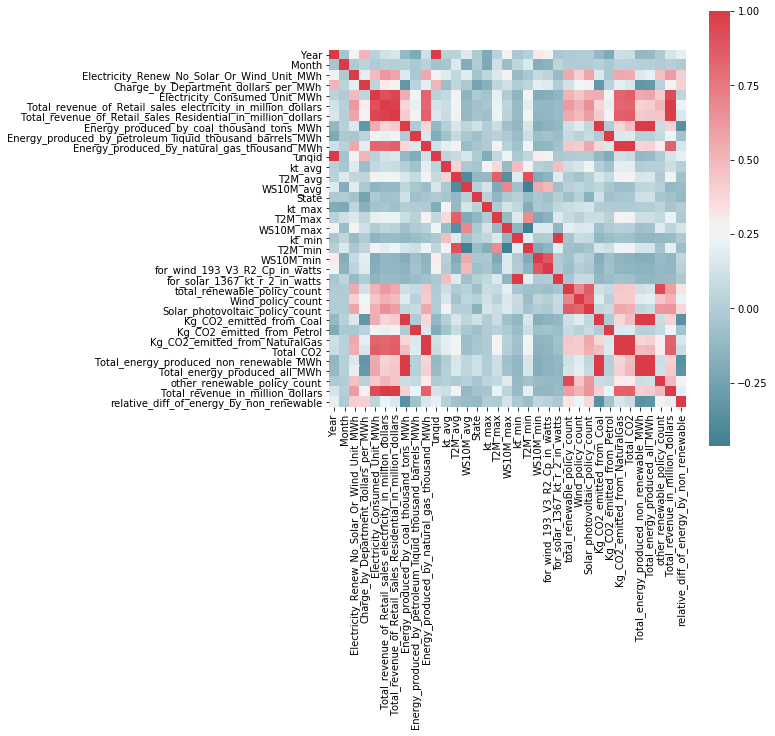

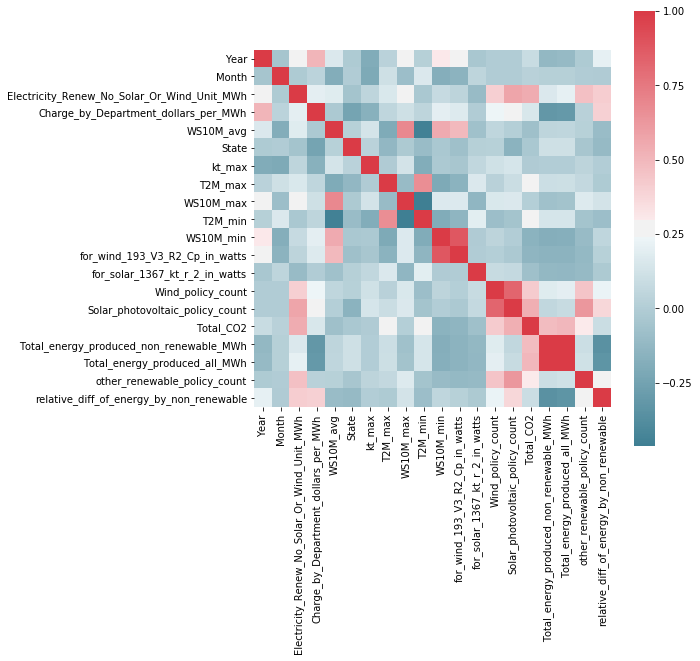

In [5]:
f, ax = plt.subplots(figsize=(8, 8))
corr = new_df.corr()
ax = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.plot()

# correlated list # Electricity_Renew_No_Solar_Or_Wind_Unit_MWh
corr_list = ['Electricity_Consumed_Unit_MWh',
        'Total_revenue_of_Retail_sales_electricity_in_million_dollars',
        'Total_revenue_of_Retail_sales_Residential_in_million_dollars',
        'Energy_produced_by_coal_thousand_tons_MWh',
        'Energy_produced_by_petroleum_liquid_thousand_barrels_MWh',
        'Energy_produced_by_natural_gas_thousand_MWh', 
        'kt_avg', 'kt_min',
        'unqid',
        'T2M_avg', 
        'total_renewable_policy_count',
        'Kg_CO2_emitted_from_Coal', 
        'Kg_CO2_emitted_from_Petrol',
        'Kg_CO2_emitted_from_NaturalGas',
        'Total_revenue_in_million_dollars']

new_df = new_df.drop(corr_list, axis = 1)

# Plot again to see if still correlated columns exists
f, ax = plt.subplots(figsize=(8, 8))
corr = new_df.corr()
ax = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.plot()

plt.savefig("correlation_Charge_by_Dept.png")

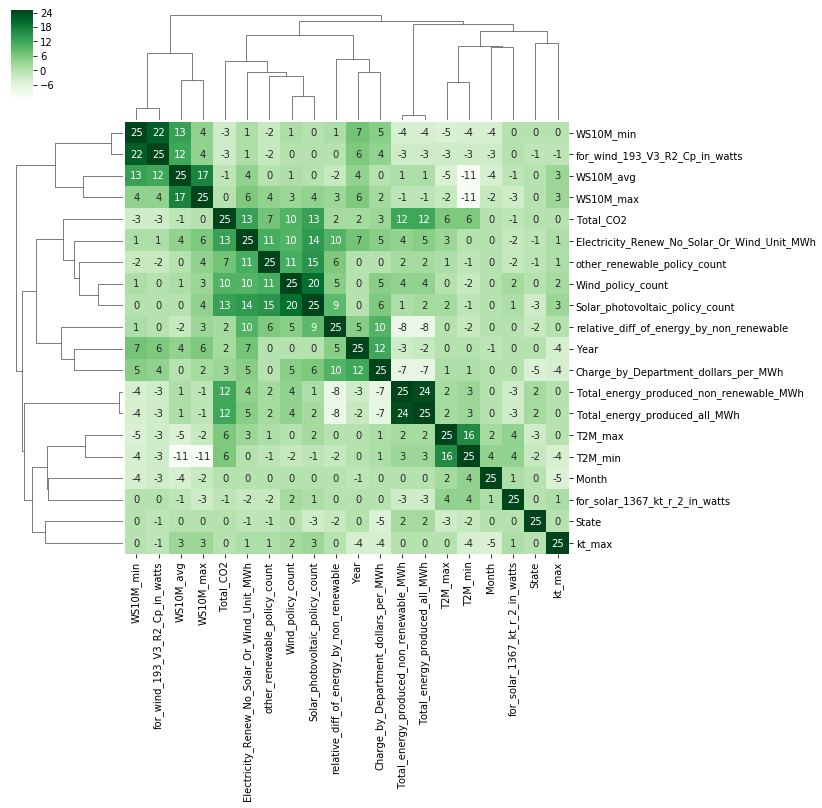

In [6]:
# f, ax = plt.subplots(figsize=(7,7))
corr = new_df.corr().mul(25).astype(int)
g = sns.clustermap(data=corr, annot=True, fmt='d', cmap='Greens')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.savefig("Dendogram_Charge.png")

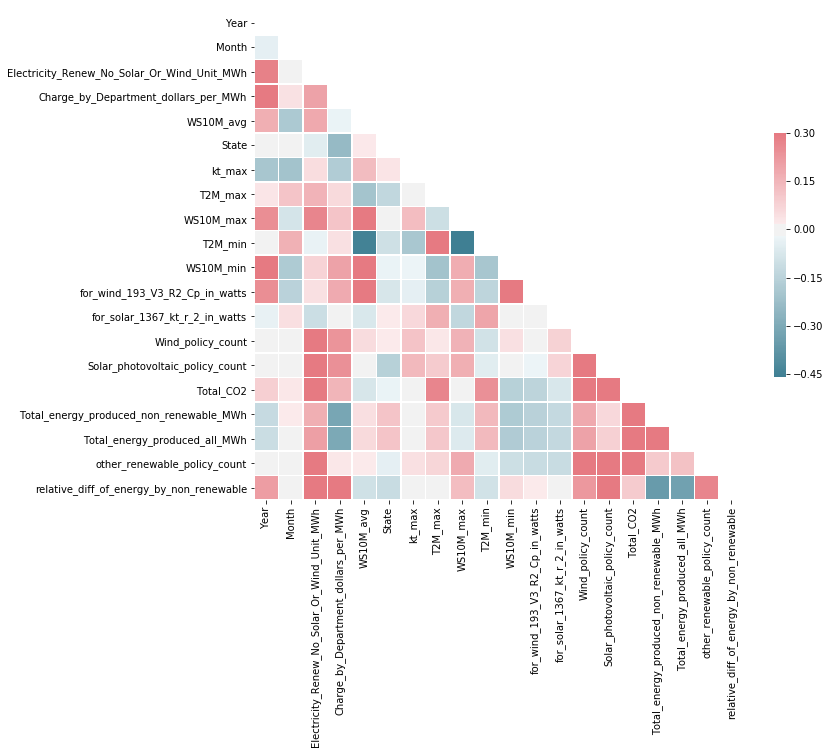

In [7]:
corr = new_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))

ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("upper_triangle_corr.png")

# Train Test Split

In [8]:
# Modifying the data before train test split to get more features
print('Shape before One Hot:',new_df.shape)
new_df = pd.get_dummies(new_df, prefix=['other_pcount_', 'wind_pcount_', 'solar_pcount_'], 
                        columns=['other_renewable_policy_count', 'Wind_policy_count',
                                 'Solar_photovoltaic_policy_count'
                                ]
                       )

new_df2 = new_df.copy()
print('Shape after One Hot:',new_df.shape)
# Step 3: separating the Y from actual data

y = np.log(new_df.Charge_by_Department_dollars_per_MWh)
x = new_df.drop(['Charge_by_Department_dollars_per_MWh'], axis=1)
y = np.log(y*(-1)) #### 

# Just to make sure that dimensions are okay to be used for split.
print('Shapes before splitting',y.shape, x.shape, new_df.shape) 

# Preparing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
print('Shapes after splitting', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape before One Hot: (9084, 20)
Shape after One Hot: (9084, 106)
Shapes before splitting (9084,) (9084, 105) (9084, 106)
Shapes after splitting (7721, 105) (7721,) (1363, 105) (1363,)


In [9]:
# A quick look a final dataset for modeling
X_train.sample(5)

,Year,Month,Electricity_Renew_No_Solar_Or_Wind_Unit_MWh,WS10M_avg,State,kt_max,T2M_max,WS10M_max,T2M_min,WS10M_min,for_wind_193_V3_R2_Cp_in_watts,for_solar_1367_kt_r_2_in_watts,Total_CO2,Total_energy_produced_non_renewable_MWh,Total_energy_produced_all_MWh,relative_diff_of_energy_by_non_renewable,other_pcount__5,other_pcount__7,other_pcount__10,other_pcount__11,other_pcount__12,other_pcount__13,other_pcount__16,other_pcount__18,other_pcount__20,other_pcount__21,other_pcount__22,other_pcount__24,other_pcount__25,other_pcount__26,other_pcount__31,other_pcount__33,other_pcount__34,other_pcount__36,other_pcount__39,...,wind_pcount__22,wind_pcount__24,wind_pcount__25,wind_pcount__28,wind_pcount__30,solar_pcount__2,solar_pcount__3,solar_pcount__6,solar_pcount__7,solar_pcount__8,solar_pcount__9,solar_pcount__10,solar_pcount__11,solar_pcount__12,solar_pcount__13,solar_pcount__14,solar_pcount__15,solar_pcount__16,solar_pcount__17,solar_pcount__18,solar_pcount__19,solar_pcount__21,solar_pcount__22,solar_pcount__23,solar_pcount__25,solar_pcount__26,solar_pcount__27,solar_pcount__28,solar_pcount__29,solar_pcount__32,solar_pcount__33,solar_pcount__40,solar_pcount__47,solar_pcount__54,solar_pcount__79
1087,2003,1,1951.00,2.433740,2,0.78,19.06,7.22,0.02,0.61,191.672921,67.3931,2.018660e+06,1.382220e+07,1.382415e+07,-99.971774,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6152,2012,12,986879.76,4.438750,33,0.71,20.36,9.82,0.00,0.86,537.114171,31.7144,3.202478e+06,1.238761e+07,1.337449e+07,-85.242355,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6324,2012,5,60351.97,1.530691,43,0.75,24.54,3.27,10.55,0.63,211.150885,67.3931,8.370988e+05,1.910531e+07,1.916566e+07,-99.370207,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8005,2015,5,21979.73,3.502539,1,0.79,19.13,12.28,0.00,0.58,164.761311,19.8215,4.596374e+05,5.029410e+05,5.249207e+05,-91.625505,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3466,2007,2,132562.02,3.212832,3,0.78,16.17,6.29,0.09,1.00,844.444783,7.9286,8.406139e+05,1.052678e+07,1.065934e+07,-97.512755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Linear Regression

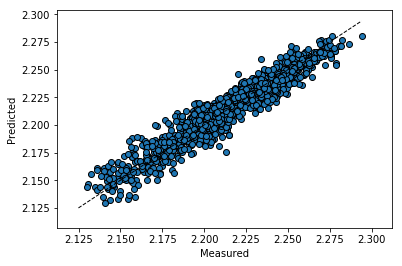

Value of root mean square error: 6.86168941555e-09


In [10]:
'''
Linear Model: basic fitting of dependent and independent variable.
'''
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

'''
cross_val_predict returns an array of the same size as `y` where each 
entry is a prediction obtained by cross validation:
'''
predicted = cross_val_predict(lr, X_train, y_train, cv=10)

# Plotting the losses.
fig, ax = plt.subplots()
ax.scatter(y_test, lr.predict(X_test), edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


print('Value of root mean square error:', np.square(sum((y_test - lr.predict(X_test))**2)/y_test.shape[0]))

In [11]:
print('Score on training data: ',lr.score(X_train, y_train)) # score on training data
print('Score on test data: ',lr.score(X_test, y_test)) # score on test data

Score on training data:  0.915680311117
Score on test data:  0.910286404062


In [12]:
import statsmodels.api as sm

# Model Training
model = sm.OLS(np.exp(y_train), X_train).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Charge_by_Department_dollars_per_MWh   R-squared:                       0.916
Model:                                              OLS   Adj. R-squared:                  0.915
Method:                                   Least Squares   F-statistic:                     1417.
Date:                                  Mon, 11 Dec 2017   Prob (F-statistic):               0.00
Time:                                          21:59:03   Log-Likelihood:                 8588.4
No. Observations:                                  7721   AIC:                        -1.706e+04
Df Residuals:                                      7661   BIC:                        -1.664e+04
Df Model:                                            59                                         
Covariance Type:                              nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Year                                           -0.0340      0.000   -120.514      0.000      -0.035      -0.033
Month                                          -0.0051      0.000    -17.937      0.000      -0.006      -0.005
Electricity_Renew_No_Solar_Or_Wind_Unit_MWh  1.566e-06   1.21e-08    129.529      0.000    1.54e-06    1.59e-06
WS10M_avg                                      -0.0184      0.003     -6.985      0.000      -0.024      -0.013
State                                           1.6783      0.012    136.526      0.000       1.654       1.702
kt_max                                         -0.0116      0.017     -0.669      0.503      -0.046       0.022
T2M_max                                        -0.0009      0.000     -3.714      0.000      -0.001      -0.000
WS10M_max                                      -0.0006      0.001     -0.903      0.366      -0.002       0.001
T2M_min                                        -0.0054      0.000    -20.978      0.000      -0.006      -0.005
WS10M_min                                       0.0206      0.007      3.156      0.002       0.008       0.033
for_wind_193_V3_R2_Cp_in_watts              -3.539e-06    1.3e-06     -2.715      0.007   -6.09e-06   -9.84e-07
for_solar_1367_kt_r_2_in_watts                 -0.0003   4.87e-05     -7.027      0.000      -0.000      -0.000
Total_CO2                                    8.876e-09   7.23e-10     12.275      0.000    7.46e-09    1.03e-08
Total_energy_produced_non_renewable_MWh      1.513e-06   1.09e-08    139.073      0.000    1.49e-06    1.53e-06
Total_energy_produced_all_MWh               -1.511e-06    1.1e-08   -137.654      0.000   -1.53e-06   -1.49e-06
relative_diff_of_energy_by_non_renewable        0.0003   4.35e-05      7.736      0.000       0.000       0.000
other_pcount__5                                26.5583      0.195    136.257      0.000      26.176      26.940
other_pcount__7                               -24.8724      0.181   -137.209      0.000     -25.228     -24.517
other_pcount__10                               15.0171      0.111    135.876      0.000      14.800      15.234
other_pcount__11                                2.4581      0.019    131.385      0.000       2.421       2.495
other_pcount__12                               -6.7439      0.050   -133.670      0.000      -6.843      -6.645
other_pcount__13                               13.8275      0.101    136.339      0.000      13.629      14.026
other_pcount__16                               30.2416      0.222    136.307      0.0

# Predictions on Test Data chart

In [13]:
predictions = model.predict(X_test) # make the predictions by the model

# # Least Squares
# print('The sum of least squares:',np.square(sum(np.exp(y_test) - predictions)))

# Predictions_df = pd.DataFrame(
#     {
#     'date': (X_test["Year"].map(str) + '-' + X_test["Month"].map(str)),  
#     'y_test':np.exp(y_test), # converting back to normal sclae
#     'predictions': predictions
# })

# # adjusting the size of plot to be displayed
# %pylab inline
# pylab.rcParams['figure.figsize'] = (16, 10)

# Predictions_df.sort_values(['date'], ascending=[1]).plot()

In [14]:
print('Slope:', lr.intercept_)
# print('\nCoefficient:', lr.coef_)


imp_df = pd.DataFrame(lr.coef_, X_train.columns)
imp_df

Slope: 9.61649991112


,0
Year,-3.690191e-03
Month,-5.247018e-04
Electricity_Renew_No_Solar_Or_Wind_Unit_MWh,-8.733269e+03
WS10M_avg,-1.365976e-03
State,1.044322e-03
kt_max,-1.480372e-04
T2M_max,-1.174299e-04
WS10M_max,-1.082759e-04
T2M_min,-5.347627e-04
WS10M_min,1.216905e-03


# Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=1,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# print(regr.feature_importances_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=1,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
# # Sorting importance matrix
# features = X_train.columns
# importances = regr.feature_importances_
# indices = np.argsort(importances)

# # adjusting the ploting area and aesthetics
# import matplotlib as mpl
# label_size = 7.25
# mpl.rcParams['ytick.labelsize'] = label_size 
# f, ax = plt.subplots(figsize=(10, 16))

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), features) ## removed [indices]
# plt.xlabel('Relative Importance', fontsize = 5)
# plt.xlabel('Relative Importance', fontsize = 1)
# plt.show()

# Step regression

In [17]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model with an intercept
           selected by forward selection evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    loop_break = 0
    while remaining and current_score == best_new_score:
        loop_break +=1
        scores_with_candidates = []
        inside_loop = 0
        for candidate in remaining:
            
            formula = "{} ~ {} + 1".format(response, ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            inside_loop +=1
            print('formula: ',loop_break,': ',inside_loop,':: ', formula)
            print('score: ', score, '\n\n')
            
            if score == 1.0:
                print('score fault, multicolinearity in the provided data, Exiting! \n')
                break
            scores_with_candidates.append((score, candidate))
            
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        if loop_break == 40000:
            print('breaking....')
            break
            
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    print('total iterations: ', loop_break)
    return model

In [18]:
model_co2 = forward_selected(new_df, 'Charge_by_Department_dollars_per_MWh')

formula:  1 :  1 ::  Charge_by_Department_dollars_per_MWh ~ solar_pcount__14 + 1
score:  0.0183229758221 


formula:  1 :  2 ::  Charge_by_Department_dollars_per_MWh ~ other_pcount__66 + 1
score:  0.00481436323663 


formula:  1 :  3 ::  Charge_by_Department_dollars_per_MWh ~ other_pcount__55 + 1
score:  0.00199453462895 


formula:  1 :  4 ::  Charge_by_Department_dollars_per_MWh ~ wind_pcount__3 + 1
score:  0.00858242115413 


formula:  1 :  5 ::  Charge_by_Department_dollars_per_MWh ~ wind_pcount__28 + 1
score:  0.0323541929438 


formula:  1 :  6 ::  Charge_by_Department_dollars_per_MWh ~ other_pcount__36 + 1
score:  0.00668325743043 


formula:  1 :  7 ::  Charge_by_Department_dollars_per_MWh ~ wind_pcount__12 + 1
score:  0.036778101347 


formula:  1 :  8 ::  Charge_by_Department_dollars_per_MWh ~ solar_pcount__19 + 1
score:  0.0200846711393 


formula:  1 :  9 ::  Charge_by_Department_dollars_per_MWh ~ T2M_max + 1
score:  0.00323375841269 


formula:  1 :  10 ::  Charge_by_Depar

formula:  1 :  79 ::  Charge_by_Department_dollars_per_MWh ~ wind_pcount__10 + 1
score:  -0.000100673740368 


formula:  1 :  80 ::  Charge_by_Department_dollars_per_MWh ~ WS10M_max + 1
score:  0.0119815581762 


formula:  1 :  81 ::  Charge_by_Department_dollars_per_MWh ~ other_pcount__20 + 1
score:  0.0152192961013 


formula:  1 :  82 ::  Charge_by_Department_dollars_per_MWh ~ other_pcount__5 + 1
score:  0.0118006804075 


formula:  1 :  83 ::  Charge_by_Department_dollars_per_MWh ~ solar_pcount__12 + 1
score:  0.00481436323663 


formula:  1 :  84 ::  Charge_by_Department_dollars_per_MWh ~ wind_pcount__18 + 1
score:  0.0547898354128 


formula:  1 :  85 ::  Charge_by_Department_dollars_per_MWh ~ Total_CO2 + 1
score:  0.0231768693812 


formula:  1 :  86 ::  Charge_by_Department_dollars_per_MWh ~ other_pcount__12 + 1
score:  0.00996543027313 


formula:  1 :  87 ::  Charge_by_Department_dollars_per_MWh ~ solar_pcount__7 + 1
score:  0.0177546997177 


formula:  1 :  88 ::  Charge_by_

formula:  2 :  59 ::  Charge_by_Department_dollars_per_MWh ~ Year + wind_pcount__25 + 1
score:  0.259870844866 


formula:  2 :  60 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__22 + 1
score:  0.2816896335 


formula:  2 :  61 ::  Charge_by_Department_dollars_per_MWh ~ Year + other_pcount__18 + 1
score:  0.260525601378 


formula:  2 :  62 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__23 + 1
score:  0.26174257659 


formula:  2 :  63 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__33 + 1
score:  0.260525601378 


formula:  2 :  64 ::  Charge_by_Department_dollars_per_MWh ~ Year + wind_pcount__11 + 1
score:  0.279201380983 


formula:  2 :  65 ::  Charge_by_Department_dollars_per_MWh ~ Year + other_pcount__13 + 1
score:  0.262014448189 


formula:  2 :  66 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__26 + 1
score:  0.259707430876 


formula:  2 :  67 ::  Charge_by_Department_dollars_per_MWh ~ Year + Month + 1
score: 

formula:  3 :  28 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + other_pcount__54 + 1
score:  0.401009506838 


formula:  3 :  29 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + 1
score:  0.496422359076 


formula:  3 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + other_pcount__47 + 1
score:  0.398784620168 


formula:  3 :  31 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + wind_pcount__4 + 1
score:  0.435485437524 


formula:  3 :  32 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + wind_pcount__5 + 1
score:  0.400932166298 


formula:  3 :  33 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + for_solar_1367_kt_r_2_in_watts + 1
score:  0.398648179696 


formula:  3 :  34 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + T2M_min + 1
score:  0.399685982532 


formula:  3 :  35 ::  Charge_by_Department_dollars_per_MWh ~ 

formula:  3 :  93 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__29 + 1
score:  0.399152408656 


formula:  3 :  94 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + WS10M_avg + 1
score:  0.40484643919 


formula:  3 :  95 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + wind_pcount__13 + 1
score:  0.406828850581 


formula:  3 :  96 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + other_pcount__42 + 1
score:  0.399339169816 


formula:  3 :  97 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + wind_pcount__7 + 1
score:  0.410967102666 


formula:  3 :  98 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + wind_pcount__24 + 1
score:  0.399706500567 


formula:  3 :  99 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + wind_pcount__15 + 1
score:  0.39860796449 


formula:  3 :  100 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_p

formula:  4 :  47 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + other_pcount__39 + 1
score:  0.500572429172 


formula:  4 :  48 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + solar_pcount__16 + 1
score:  0.49900794928 


formula:  4 :  49 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + solar_pcount__6 + 1
score:  0.506129731195 


formula:  4 :  50 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + solar_pcount__13 + 1
score:  0.497181984646 


formula:  4 :  51 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + solar_pcount__11 + 1
score:  0.53911130167 


formula:  4 :  52 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + other_pcount__24 + 1
score:  0.5007130363 


formula:  4 :  53 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + 

formula:  4 :  102 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + solar_pcount__3 + 1
score:  0.513350896208 


formula:  5 :  1 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + solar_pcount__14 + 1
score:  0.564782648823 


formula:  5 :  2 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__66 + 1
score:  0.560883756339 


formula:  5 :  3 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__55 + 1
score:  0.559755444753 


formula:  5 :  4 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + wind_pcount__3 + 1
score:  0.563213694089 


formula:  5 :  5 ::  Charge_by_Department_dollars_per_MWh ~ Year + so

formula:  5 :  50 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + solar_pcount__11 + 1
score:  0.567091088271 


formula:  5 :  51 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__24 + 1
score:  0.565765331712 


formula:  5 :  52 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + 1
score:  0.605223935408 


formula:  5 :  53 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__68 + 1
score:  0.56038274042 


formula:  5 :  54 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__41 + 1
score:  0.563622616563 


formula:  5 :  55 :: 

formula:  5 :  100 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__22 + 1
score:  0.560458586598 


formula:  5 :  101 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + solar_pcount__3 + 1
score:  0.571969545729 


formula:  6 :  1 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + solar_pcount__14 + 1
score:  0.609280219396 


formula:  6 :  2 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + other_pcount__66 + 1
score:  0.60625433732 


formula:  6 :  3 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + other_pcount_

formula:  6 :  43 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + other_pcount__69 + 1
score:  0.605190252831 


formula:  6 :  44 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + solar_pcount__17 + 1
score:  0.605998882032 


formula:  6 :  45 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + other_pcount__148 + 1
score:  0.614707378843 


formula:  6 :  46 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + other_pcount__39 + 1
score:  0.611782495147 


formula:  6 :  47 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_re

formula:  6 :  88 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + solar_pcount__10 + 1
score:  0.608970858342 


formula:  6 :  89 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + WS10M_min + 1
score:  0.605297302929 


formula:  6 :  90 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + solar_pcount__29 + 1
score:  0.605214821288 


formula:  6 :  91 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + WS10M_avg + 1
score:  0.60519073384 


formula:  6 :  92 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_

formula:  7 :  29 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + wind_pcount__5 + 1
score:  0.647136645864 


formula:  7 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + for_solar_1367_kt_r_2_in_watts + 1
score:  0.647164792561 


formula:  7 :  31 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + T2M_min + 1
score:  0.650960879108 


formula:  7 :  32 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + Total_energy_produced_non_renewable_MWh + 1
score:  0.64707603054 


formula:  7 :  33 ::  Charge_by_Department_

formula:  7 :  69 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__7 + 1
score:  0.653716900034 


formula:  7 :  70 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__98 + 1
score:  0.668161437206 


formula:  7 :  71 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + kt_max + 1
score:  0.647083657335 


formula:  7 :  72 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__40 + 1
score:  0.650230495285 


formula:  7 :  73 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcoun

formula:  8 :  9 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + other_pcount__142 + 1
score:  0.679263614528 


formula:  8 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__8 + 1
score:  0.680710904059 


formula:  8 :  11 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + other_pcount__33 + 1
score:  0.681060089323 


formula:  8 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + wind_pcount__14 + 1
score:  0.6824696258

formula:  8 :  44 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + other_pcount__148 + 1
score:  0.690633063206 


formula:  8 :  45 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + other_pcount__39 + 1
score:  0.688248201669 


formula:  8 :  46 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__16 + 1
score:  0.679257953449 


formula:  8 :  47 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__6 + 1
score:  0.68260922

formula:  8 :  79 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + Total_CO2 + 1
score:  0.69037874353 


formula:  8 :  80 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + other_pcount__12 + 1
score:  0.681658162775 


formula:  8 :  81 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__7 + 1
score:  0.682133279061 


formula:  8 :  82 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + other_pcount__31 + 1
score:  0.679248434015 


f

formula:  9 :  16 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + other_pcount__53 + 1
score:  0.744291667341 


formula:  9 :  17 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__32 + 1
score:  0.751365730215 


formula:  9 :  18 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + other_pcount__34 + 1
score:  0.750043393688 


formula:  9 :  19 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + o

formula:  9 :  51 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + other_pcount__68 + 1
score:  0.744481407736 


formula:  9 :  52 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + other_pcount__41 + 1
score:  0.744463451198 


formula:  9 :  53 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + wind_pcount__22 + 1
score:  0.753535819344 


formula:  9 :  54 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + ot

formula:  9 :  86 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + WS10M_min + 1
score:  0.742346036363 


formula:  9 :  87 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__29 + 1
score:  0.742376470213 


formula:  9 :  88 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + WS10M_avg + 1
score:  0.742739005988 


formula:  9 :  89 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__1

formula:  10 :  21 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + other_pcount__21 + 1
score:  0.76282849226 


formula:  10 :  22 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + 1
score:  0.765574363569 


formula:  10 :  23 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + wind_pcount__8 + 1
score:  0.762412562726 


formula:  10 :  24 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__2

formula:  10 :  51 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + other_pcount__68 + 1
score:  0.763760818004 


formula:  10 :  52 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + other_pcount__41 + 1
score:  0.764306506 


formula:  10 :  53 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + wind_pcount__22 + 1
score:  0.774684315723 


formula:  10 :  54 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_

formula:  10 :  81 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + other_pcount__31 + 1
score:  0.761968550515 


formula:  10 :  82 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__2 + 1
score:  0.763992062115 


formula:  10 :  83 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + other_pcount__26 + 1
score:  0.765102276991 


formula:  10 :  84 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_ener

formula:  11 :  15 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + other_pcount__53 + 1
score:  0.781047477981 


formula:  11 :  16 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + solar_pcount__32 + 1
score:  0.788750844687 


formula:  11 :  17 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + other_pcount__34 + 1
score:  0.779277809015 


formula:  11 :  18 ::  Charge_by_Department_dollars_per_MWh ~ Year + s

formula:  11 :  45 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + solar_pcount__16 + 1
score:  0.779289187675 


formula:  11 :  46 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + solar_pcount__6 + 1
score:  0.782364251572 


formula:  11 :  47 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + solar_pcount__13 + 1
score:  0.779280407079 


formula:  11 :  48 ::  Charge_by_Department_dollars_per_MWh ~ Year + so

formula:  11 :  75 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + solar_pcount__12 + 1
score:  0.779554829075 


formula:  11 :  76 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + wind_pcount__18 + 1
score:  0.779670222202 


formula:  11 :  77 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + 1
score:  0.791682406938 


formula:  11 :  78 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pco


formula:  12 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + other_pcount__33 + 1
score:  0.792800574997 


formula:  12 :  11 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + wind_pcount__14 + 1
score:  0.795494916669 


formula:  12 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__40 + 1
score:  0.801948184465 


formula:  12 :  13 ::  Charge_by_D

formula:  12 :  36 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + Total_energy_produced_all_MWh + 1
score:  0.794360626878 


formula:  12 :  37 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + other_pcount__78 + 1
score:  0.801149060277 


formula:  12 :  38 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + other_pcount__86 + 1
score:  0.801948184465 


formula:  12 :  39 ::

score:  0.792832199125 


formula:  12 :  65 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + other_pcount__73 + 1
score:  0.792981134721 


formula:  12 :  66 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + other_pcount__7 + 1
score:  0.795916430255 


formula:  12 :  67 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + other_pcount__98 + 1
score:  0.791682406938 


formula: 

formula:  12 :  91 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + other_pcount__25 + 1
score:  0.791761259693 


formula:  12 :  92 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__54 + 1
score:  0.792981134721 


formula:  12 :  93 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + other_pcount__22 + 1
score:  0.791687144196 


formula:  12 :  94 ::  Charge_by_D

formula:  13 :  22 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__8 + 1
score:  0.807519783553 


formula:  13 :  23 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + solar_pcount__9 + 1
score:  0.80918684749 


formula:  13 :  24 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + solar_pcount__79 + 1
score: 

formula:  13 :  47 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + solar_pcount__13 + 1
score:  0.807510818841 


formula:  13 :  48 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + other_pcount__24 + 1
score:  0.807592039011 


formula:  13 :  49 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + other_pcount__68 + 1
sco

formula:  13 :  72 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + other_pcount__20 + 1
score:  0.811382785342 


formula:  13 :  73 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + other_pcount__5 + 1
score:  0.80807034857 


formula:  13 :  74 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + solar_pcount__12 + 1
score

formula:  14 :  4 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__3 + 1
score:  0.82755511802 


formula:  14 :  5 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + other_pcount__36 + 1
score:  0.82680980319 


formula:  14 :  6 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__

formula:  14 :  29 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + T2M_min + 1
score:  0.833504903567 


formula:  14 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + Total_energy_produced_non_renewable_MWh + 1
score:  0.827143967905 


formula:  14 :  31 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total

formula:  14 :  54 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + solar_pcount__23 + 1
score:  0.826477368661 


formula:  14 :  55 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + solar_pcount__33 + 1
score:  0.826808485322 


formula:  14 :  56 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_p

formula:  14 :  79 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + other_pcount__26 + 1
score:  0.828292391357 


formula:  14 :  80 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__6 + 1
score:  0.826395760646 


formula:  14 :  81 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pco

formula:  15 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + wind_pcount__16 + 1
score:  0.84478702513 


formula:  15 :  13 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + wind_pcount__9 + 1
score:  0.83920234938 


formula:  15 :  14 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_p

formula:  15 :  37 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + other_pcount__86 + 1
score:  0.839391970499 


formula:  15 :  38 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + for_wind_193_V3_R2_Cp_in_watts + 1
score:  0.837661588332 


formula:  15 :  39 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_p

formula:  15 :  62 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + other_pcount__73 + 1
score:  0.837985519975 


formula:  15 :  63 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + other_pcount__7 + 1
score:  0.841630348864 


formula:  15 :  64 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + sol

formula:  15 :  87 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + wind_pcount__15 + 1
score:  0.839487708532 


formula:  15 :  88 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + other_pcount__25 + 1
score:  0.837665821816 


formula:  15 :  89 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + sol

formula:  16 :  17 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + other_pcount__11 + 1
score:  0.855868393656 


formula:  16 :  18 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__47 + 1
score:  0.84895811978 


formula:  16 :  19 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + sol

formula:  16 :  41 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + other_pcount__148 + 1
score:  0.847912602355 


formula:  16 :  42 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + other_pcount__39 + 1
score:  0.847912602355 


formula:  16 :  43 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + s

formula:  16 :  65 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + other_pcount__40 + 1
score:  0.849000295787 


formula:  16 :  66 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + other_pcount__59 + 1
score:  0.85167378366 


formula:  16 :  67 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + sol

formula:  16 :  89 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + other_pcount__22 + 1
score:  0.848693554204 


formula:  16 :  90 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__3 + 1
score:  0.852213338926 


formula:  17 :  1 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + sola

formula:  17 :  19 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + other_pcount__21 + 1
score:  0.856040831765 


formula:  17 :  20 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + 1
score:  0.856420901699 


formula:  17 :  21 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renew

formula:  17 :  39 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + solar_pcount__17 + 1
score:  0.856216513685 


formula:  17 :  40 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + other_pcount__148 + 1
score:  0.856031495942 


formula:  17 :  41 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + 

formula:  17 :  59 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + solar_pcount__25 + 1
score:  0.858149898194 


formula:  17 :  60 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + other_pcount__73 + 1
score:  0.856344247957 


formula:  17 :  61 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + w

formula:  17 :  79 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + solar_pcount__29 + 1
score:  0.857234930838 


formula:  17 :  80 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + WS10M_avg + 1
score:  0.857129624461 


formula:  17 :  81 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pco

formula:  18 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__14 + 1
score:  0.863633386344 


formula:  18 :  11 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + solar_pcount__40 + 1
score:  0.863824697279 


formula:  18 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + o

formula:  18 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__30 + 1
score:  0.863057431944 


formula:  18 :  31 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + solar_pcount__21 + 1
score:  0.86319191266 


formula:  18 :  32 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + ot

formula:  18 :  50 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + solar_pcount__23 + 1
score:  0.863276817395 


formula:  18 :  51 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + solar_pcount__33 + 1
score:  0.863880919394 


formula:  18 :  52 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + 

formula:  18 :  70 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__18 + 1
score:  0.86633161816 


formula:  18 :  71 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + other_pcount__12 + 1
score:  0.863688953156 


formula:  18 :  72 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + ot

formula:  19 :  2 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__66 + 1
score:  0.867449453242 


formula:  19 :  3 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__55 + 1
score:  0.867475362276 


formula:  19 :  4 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_dif

formula:  19 :  22 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + solar_pcount__9 + 1
score:  0.868697714922 


formula:  19 :  23 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + solar_pcount__79 + 1
score:  0.867338112053 


formula:  19 :  24 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_d

formula:  19 :  42 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + solar_pcount__13 + 1
score:  0.867325567729 


formula:  19 :  43 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__24 + 1
score:  0.867410573137 


formula:  19 :  44 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_

formula:  19 :  62 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__40 + 1
score:  0.867331565146 


formula:  19 :  63 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + 1
score:  0.871855775361 


formula:  19 :  64 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_

formula:  19 :  82 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + wind_pcount__24 + 1
score:  0.867475362276 


formula:  19 :  83 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + wind_pcount__15 + 1
score:  0.869394888192 


formula:  19 :  84 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_di

formula:  20 :  15 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + solar_pcount__32 + 1
score:  0.871855775361 


formula:  20 :  16 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + other_pcount__34 + 1
score:  0.871918341431 


formula:  20 :  17 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pco

formula:  20 :  35 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + for_wind_193_V3_R2_Cp_in_watts + 1
score:  0.871999699911 


formula:  20 :  36 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + other_pcount__69 + 1
score:  0.873060503958 


formula:  20 :  37 ::  Charge_by_Department_dollars_per_MWh ~ Ye

formula:  20 :  55 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + other_pcount__64 + 1
score:  0.874665189056 


formula:  20 :  56 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + State + 1
score:  0.874954450021 


formula:  20 :  57 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + s

formula:  20 :  75 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + WS10M_min + 1
score:  0.872145488602 


formula:  20 :  76 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + solar_pcount__29 + 1
score:  0.872759868349 


formula:  20 :  77 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27

formula:  21 :  9 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + other_pcount__33 + 1
score:  0.876086876406 


formula:  21 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__14 + 1
score:  0.876042976884 


formula:  21 :  11 ::  Charge_by_Department_do

formula:  21 :  29 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__30 + 1
score:  0.875646238881 


formula:  21 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + solar_pcount__21 + 1
score:  0.875314739837 


formula:  21 :  31 ::  Charge_by_Department_d

formula:  21 :  49 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + solar_pcount__23 + 1
score:  0.875339114934 


formula:  21 :  50 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + solar_pcount__33 + 1
score:  0.875715233975 


formula:  21 :  51 ::  Charge_by_Department_

formula:  21 :  69 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + other_pcount__12 + 1
score:  0.876774476008 


formula:  21 :  70 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + solar_pcount__7 + 1
score:  0.875494410075 


formula:  21 :  71 ::  Charge_by_Department_d

formula:  22 :  3 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + other_pcount__55 + 1
score:  0.878020865923 


formula:  22 :  4 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + wind_pcount__3 + 1
score:  0.878983500978 


formula:  22

formula:  22 :  21 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + wind_pcount__8 + 1
score:  0.878015742406 


formula:  22 :  22 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + solar_pcount__9 + 1
score:  0.880195043011 


formula:  2

formula:  22 :  39 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + other_pcount__39 + 1
score:  0.878027365314 


formula:  22 :  40 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + solar_pcount__16 + 1
score:  0.878334929469 


formula:

formula:  22 :  57 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + solar_pcount__25 + 1
score:  0.879134292169 


formula:  22 :  58 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + other_pcount__73 + 1
score:  0.878034492426 


formula:

formula:  22 :  75 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + solar_pcount__29 + 1
score:  0.878607685524 


formula:  22 :  76 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + WS10M_avg + 1
score:  0.878115817989 


formula:  22 : 

formula:  23 :  9 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__33 + 1
score:  0.881010166115 


formula:  23 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + wind_pcount__14 + 1
score:  0.8818571272

formula:  23 :  27 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + for_solar_1367_kt_r_2_in_watts + 1
score:  0.881294908577 


formula:  23 :  28 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + Total_energy_produced_non

formula:  23 :  45 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__41 + 1
score:  0.881321073231 


formula:  23 :  46 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + wind_pcount__22 + 1
score:  0.881921174

formula:  23 :  63 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__20 + 1
score:  0.880759596426 


formula:  23 :  64 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__5 + 1
score:  0.881857127

formula:  23 :  81 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + solar_pcount__54 + 1
score:  0.880918881706 


formula:  23 :  82 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__22 + 1
score:  0.88244649

formula:  24 :  16 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__34 + 1
score:  0.883184578883 


formula:  24 :  17 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + o

formula:  24 :  34 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__86 + 1
score:  0.884168188437 


formula:  24 :  35 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + f

formula:  24 :  52 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__13 + 1
score:  0.882869628626 


formula:  24 :  53 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + s

formula:  24 :  70 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + solar_pcount__2 + 1
score:  0.883216176205 


formula:  24 :  71 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + wi

formula:  25 :  6 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + T2M_max + 1
score:  0.884928389778 


formula:  25 :  7 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount

formula:  25 :  24 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + other_pcount__47 + 1
score:  0.885744618924 


formula:  25 :  25 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + o

formula:  25 :  42 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + other_pcount__24 + 1
score:  0.884863957029 


formula:  25 :  43 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + o

formula:  25 :  60 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + other_pcount__40 + 1
score:  0.884872777101 


formula:  25 :  61 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + o

formula:  25 :  78 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + other_pcount__25 + 1
score:  0.884877492114 


formula:  25 :  79 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + o

formula:  26 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__16 + 1
score:  0.887152708312 


formula:  26 :  13 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + St

formula:  26 :  27 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + Total_energy_produced_non_renewable_MWh + 1
score:  0.886787127947 


formula:  26 :  28 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__

formula:  26 :  42 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + other_pcount__24 + 1
score:  0.886795859544 


formula:  26 :  43 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + S

formula:  26 :  57 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + other_pcount__98 + 1
score:  0.886787538799 


formula:  26 :  58 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + S

formula:  26 :  72 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + WS10M_avg + 1
score:  0.886820724616 


formula:  26 :  73 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + 

formula:  27 :  7 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + other_pcount__142 + 1
score:  0.888798002991 


formula:  27 :  8 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wi

formula:  27 :  22 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__9 + 1
score:  0.888356258929 


formula:  27 :  23 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wi

formula:  27 :  37 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + other_pcount__148 + 1
score:  0.888356258929 


formula:  27 :  38 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + 

formula:  27 :  52 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__26 + 1
score:  0.889405776979 


formula:  27 :  53 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + w

formula:  27 :  67 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + other_pcount__31 + 1
score:  0.88935286917 


formula:  27 :  68 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wi

formula:  28 :  3 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__55 + 1
score:  0.889785642674 


formula:  28 :  4 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + w

formula:  28 :  18 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + solar_pcount__47 + 1
score:  0.889948284719 


formula:  28 :  19 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 +

formula:  28 :  33 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__86 + 1
score:  0.890660942752 


formula:  28 :  34 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 +

formula:  28 :  48 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + solar_pcount__23 + 1
score:  0.889785642674 


formula:  28 :  49 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 +

formula:  28 :  63 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + wind_pcount__18 + 1
score:  0.890545633519 


formula:  28 :  64 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + 

formula:  28 :  78 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + solar_pcount__3 + 1
score:  0.89078922961 


formula:  29 :  1 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wi

formula:  29 :  15 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + solar_pcount__32 + 1
score:  0.891047034267 


formula:  29 :  16 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 +

formula:  29 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + Total_energy_produced_all_MWh + 1
score:  0.891119059519 


formula:  29 :  31 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + win

formula:  29 :  45 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + wind_pcount__25 + 1
score:  0.89103507656 


formula:  29 :  46 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + o

formula:  29 :  60 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__5 + 1
score:  0.892208051556 


formula:  29 :  61 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + 

formula:  29 :  75 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + solar_pcount__54 + 1
score:  0.891419173235 


formula:  29 :  76 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 +

formula:  30 :  13 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__9 + 1
score:  0.892405530363 


formula:  30 :  14 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min +

formula:  30 :  28 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + solar_pcount__21 + 1
score:  0.892925221968 


formula:  30 :  29 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min

formula:  30 :  43 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + other_pcount__41 + 1
score:  0.893004513846 


formula:  30 :  44 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min

formula:  30 :  58 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + other_pcount__20 + 1
score:  0.892405530363 


formula:  30 :  59 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min

formula:  30 :  73 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + other_pcount__25 + 1
score:  0.892395149799 


formula:  30 :  74 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min

formula:  31 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + wind_pcount__16 + 1
score:  0.894011187017 


formula:  31 :  13 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pco

formula:  31 :  27 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + wind_pcount__30 + 1
score:  0.894140416458 


formula:  31 :  28 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pco

formula:  31 :  42 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + other_pcount__68 + 1
score:  0.894817786645 


formula:  31 :  43 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pc

formula:  31 :  57 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + WS10M_max + 1
score:  0.893927870988 


formula:  31 :  58 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__1

formula:  31 :  72 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + other_pcount__25 + 1
score:  0.893978789387 


formula:  31 :  73 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pc

formula:  32 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + wind_pcount__16 + 1
score:  0.895030980965 


formula:  32 :  13 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcou

formula:  32 :  27 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + wind_pcount__30 + 1
score:  0.89524802517 


formula:  32 :  28 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcoun

formula:  32 :  42 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__68 + 1
score:  0.895811187907 


formula:  32 :  43 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pco

formula:  32 :  57 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + WS10M_max + 1
score:  0.894943955017 


formula:  32 :  58 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18

formula:  32 :  72 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__25 + 1
score:  0.894984605419 


formula:  32 :  73 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pco

formula:  33 :  13 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + wind_pcount__9 + 1
score:  0.895982720733 


formula:  33 :  14 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcoun

formula:  33 :  25 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + Total_energy_produced_non_renewable_MWh + 1
score:  0.895984231169 


formula:  33 :  26 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + win

formula:  33 :  37 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__16 + 1
score:  0.896003317625 


formula:  33 :  38 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pco

formula:  33 :  52 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + other_pcount__7 + 1
score:  0.895988852933 


formula:  33 :  53 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcou

formula:  33 :  67 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + WS10M_avg + 1
score:  0.895989832957 


formula:  33 :  68 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17

formula:  34 :  6 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + T2M_max + 1
score:  0.896980400776 


formula:  34 :  7 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + 

formula:  34 :  18 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + other_pcount__21 + 1
score:  0.896802383886 


formula:  34 :  19 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pc

formula:  34 :  31 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + other_pcount__86 + 1
score:  0.897301447813 


formula:  34 :  32 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pc

score:  0.897301447813 


formula:  34 :  44 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__25 + 1
score:  0.897052179118 


formula:  34 :  45 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + s

formula:  34 :  58 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + solar_pcount__12 + 1
score:  0.897095137237 


formula:  34 :  59 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pc

formula:  34 :  71 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + solar_pcount__54 + 1
score:  0.898789036217 


formula:  34 :  72 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pc

formula:  35 :  11 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + solar_pcount__40 + 1
score:  0.89913231396 


formula:  35 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pco

formula:  35 :  23 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + wind_pcount__5 + 1
score:  0.89877812298 


formula:  35 :  24 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcoun

formula:  35 :  35 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + other_pcount__39 + 1
score:  0.898789036217 


formula:  35 :  36 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pc

formula:  35 :  47 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + wind_pcount__11 + 1
score:  0.899077416502 


formula:  35 :  48 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pco

formula:  35 :  59 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + solar_pcount__7 + 1
score:  0.899002630085 


formula:  35 :  60 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pco

formula:  35 :  71 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + other_pcount__22 + 1
score:  0.899740716098 


formula:  36 :  1 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pco

formula:  36 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + wind_pcount__16 + 1
score:  0.901021512649 


formula:  36 :  13 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount_

formula:  36 :  24 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + Total_energy_produced_non_renewable_MWh + 1
score:  0.900955505415 


formula:  36 :  25 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pc

formula:  36 :  36 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + solar_pcount__6 + 1
score:  0.901238695358 


formula:  36 :  37 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount_

formula:  36 :  48 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__73 + 1
score:  0.900766082896 


formula:  36 :  49 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount

formula:  36 :  60 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + solar_pcount__2 + 1
score:  0.9007757081 


formula:  36 :  61 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__2

formula:  37 :  2 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + other_pcount__66 + 1
score:  0.902464609951 


formula:  37 :  3 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__

formula:  37 :  14 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + other_pcount__53 + 1
score:  0.902169867838 


formula:  37 :  15 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount

formula:  37 :  26 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + other_pcount__10 + 1
score:  0.902159679787 


formula:  37 :  27 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount

formula:  37 :  38 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + other_pcount__24 + 1
score:  0.902507566545 


formula:  37 :  39 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount

formula:  37 :  50 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + other_pcount__98 + 1
score:  0.902159679787 


formula:  37 :  51 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount

formula:  37 :  62 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + WS10M_min + 1
score:  0.90214886659 


formula:  37 :  63 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + s

formula:  38 :  5 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + other_pcount__36 + 1
score:  0.902947764694 


formula:  38 :  6 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__1

formula:  38 :  17 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + solar_pcount__47 + 1
score:  0.903027262854 


formula:  38 :  18 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount_

formula:  38 :  29 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + other_pcount__86 + 1
score:  0.903009345717 


formula:  38 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount_

formula:  38 :  41 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__22 + 1
score:  0.903009345717 


formula:  38 :  42 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__

formula:  38 :  53 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + WS10M_max + 1
score:  0.902948283179 


formula:  38 :  54 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + s

formula:  38 :  65 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__13 + 1
score:  0.903205910736 


formula:  38 :  66 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__

formula:  39 :  9 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + other_pcount__33 + 1
score:  0.903790939381 


formula:  39 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__1

formula:  39 :  21 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + solar_pcount__79 + 1
score:  0.903714120993 


formula:  39 :  22 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__

formula:  39 :  31 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + other_pcount__69 + 1
score:  0.903766483665 


formula:  39 :  32 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__

formula:  39 :  43 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + solar_pcount__23 + 1
score:  0.903714120993 


formula:  39 :  44 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__

formula:  39 :  55 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + solar_pcount__12 + 1
score:  0.903856378059 


formula:  39 :  56 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__

formula:  39 :  67 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + solar_pcount__54 + 1
score:  0.903714120993 


formula:  40 :  1 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__1

formula:  40 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + wind_pcount__14 + 1
score:  0.904195959619 


formula:  40 :  11 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + 

formula:  40 :  20 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + solar_pcount__9 + 1
score:  0.904195959619 


formula:  40 :  21 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + 

formula:  40 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__69 + 1
score:  0.904303408197 


formula:  40 :  31 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable +

formula:  40 :  40 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + wind_pcount__22 + 1
score:  0.904230206528 


formula:  40 :  41 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + 

formula:  40 :  50 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__40 + 1
score:  0.904637038476 


formula:  40 :  51 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable +

formula:  40 :  60 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + WS10M_min + 1
score:  0.904186371498 


formula:  40 :  61 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_

formula:  41 :  4 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__3 + 1
score:  0.904667696185 


formula:  41 :  5 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_

formula:  41 :  14 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + other_pcount__53 + 1
score:  0.904691052541 


formula:  41 :  15 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy

formula:  41 :  24 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + solar_pcount__21 + 1
score:  0.904691052541 


formula:  41 :  25 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy

formula:  41 :  34 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + solar_pcount__16 + 1
score:  0.904766479913 


formula:  41 :  35 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy

formula:  41 :  44 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__11 + 1
score:  0.90473327064 


formula:  41 :  45 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_b

formula:  41 :  54 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + solar_pcount__12 + 1
score:  0.90473327064 


formula:  41 :  55 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_

formula:  41 :  64 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + other_pcount__25 + 1
score:  0.90471932402 


formula:  41 :  65 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_

formula:  42 :  9 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + other_pcount__33 + 1
score:  0.904958587691 


formula:  42 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relati

formula:  42 :  19 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__8 + 1
score:  0.90497732803 


formula:  42 :  20 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative

formula:  42 :  29 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + for_wind_193_V3_R2_Cp_in_watts + 1
score:  0.904961817547 


formula:  42 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcou

formula:  42 :  39 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + other_pcount__41 + 1
score:  0.905049625225 


formula:  42 :  40 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relat

formula:  42 :  49 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + kt_max + 1
score:  0.904958501998 


formula:  42 :  50 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_o

formula:  42 :  59 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + WS10M_min + 1
score:  0.904959143622 


formula:  42 :  60 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_dif

formula:  43 :  5 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__36 + 1
score:  0.905174334535 


formula:  43 :  6 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pco

formula:  43 :  15 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + solar_pcount__32 + 1
score:  0.90517772295 


formula:  43 :  16 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pc

formula:  43 :  25 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + Total_energy_produced_all_MWh + 1
score:  0.905190052286 


formula:  43 :  26 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount_

formula:  43 :  35 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + solar_pcount__13 + 1
score:  0.905439728853 


formula:  43 :  36 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_p

formula:  43 :  45 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__73 + 1
score:  0.90517772295 


formula:  43 :  46 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pc

formula:  43 :  55 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + solar_pcount__7 + 1
score:  0.905172902118 


formula:  43 :  56 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pc

formula:  44 :  2 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + other_pcount__66 + 1
score:  0.905435661555 


formula:  44 :  3 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pco

formula:  44 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + wind_pcount__16 + 1
score:  0.905499372757 


formula:  44 :  13 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pc

formula:  44 :  22 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + Total_energy_produced_non_renewable_MWh + 1
score:  0.905465294644 


formula:  44 :  23 ::  Charge_by_Department_dollars_p

formula:  44 :  32 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + other_pcount__39 + 1
score:  0.905439728853 


formula:  44 :  33 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_p

formula:  44 :  42 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__33 + 1
score:  0.905435602956 


formula:  44 :  43 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_p

formula:  44 :  52 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + other_pcount__5 + 1
score:  0.905439728853 


formula:  44 :  53 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pc

formula:  44 :  62 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__54 + 1
score:  0.905439728853 


formula:  45 :  1 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pc

formula:  45 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + wind_pcount__14 + 1
score:  0.905586152636 


formula:  45 :  11 ::  Charge_by_Department_dollars_per_MW

formula:  45 :  20 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + solar_pcount__9 + 1
score:  0.905586152636 


formula:  45 :  21 ::  Charge_by_Department_dollars_per_MW

formula:  45 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + solar_pcount__17 + 1
score:  0.905663295531 


formula:  45 :  31 ::  Charge_by_Department_dollars_per_M

formula:  45 :  40 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + solar_pcount__23 + 1
score:  0.905586152636 


formula:  45 :  41 ::  Charge_by_Department_dollars_per_M

formula:  45 :  50 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + other_pcount__20 + 1
score:  0.905586152636 


formula:  45 :  51 ::  Charge_by_Department_dollars_per_M

formula:  45 :  60 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + other_pcount__25 + 1
score:  0.905576879681 


formula:  45 :  61 ::  Charge_by_Department_dollars_per_M

formula:  46 :  9 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + other_pcount__33 + 1
score:  0.905794135302 


formula:  46 :  10 ::  Charge_by_Department_do

formula:  46 :  19 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + wind_pcount__8 + 1
score:  0.905785144752 


formula:  46 :  20 ::  Charge_by_Department_dol

formula:  46 :  29 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + other_pcount__69 + 1
score:  0.905829490284 


formula:  46 :  30 ::  Charge_by_Department_d

formula:  46 :  39 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + other_pcount__18 + 1
score:  0.905781801498 


formula:  46 :  40 ::  Charge_by_Department_d

formula:  46 :  49 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + WS10M_max + 1
score:  0.905799401979 


formula:  46 :  50 ::  Charge_by_Department_dollars_

formula:  46 :  59 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + other_pcount__25 + 1
score:  0.905829395489 


formula:  46 :  60 ::  Charge_by_Department_d

formula:  47 :  9 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + other_pcount__33 + 1
score:  0.905906233237 


formula:  47 :

formula:  47 :  19 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + wind_pcount__8 + 1
score:  0.905914602609 


formula:  47 : 

formula:  47 :  29 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__17 + 1
score:  0.905930025762 


formula:  47 

formula:  47 :  39 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__23 + 1
score:  0.905884761196 


formula:  47 

formula:  47 :  49 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + other_pcount__20 + 1
score:  0.905884761196 


formula:  47 

formula:  47 :  59 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__54 + 1
score:  0.905884761196 


formula:  48 

formula:  48 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__14 + 1
score:  0.90596900852

formula:  48 :  20 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + solar_pcount__9 + 1
score:  0.90596900852

formula:  48 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + other_pcount__148 + 1
score:  0.905969008

formula:  48 :  40 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + solar_pcount__33 + 1
score:  0.9059772255

formula:  48 :  50 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + other_pcount__5 + 1
score:  0.90596900852

formula:  49 :  2 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + other_pcount__66 + 1
scor

formula:  49 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + wind_pcount__9 + 1
score

formula:  49 :  22 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__21 + 1
sco

formula:  49 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + other_pcount__39 + 1
sco

formula:  49 :  40 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + wind_pcount__11 + 1
scor

formula:  49 :  50 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + other_pcount__12 + 1
sco

formula:  50 :  3 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_p

formula:  50 :  11 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + wind_p

formula:  50 :  20 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + Total_

formula:  50 :  28 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  50 :  36 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  50 :  44 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + kt_max

formula:  50 :  52 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + wind_p

formula:  51 :  4 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_p

formula:  51 :  12 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  51 :  20 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  51 :  28 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  51 :  36 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  51 :  44 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  51 :  52 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  52 :  5 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_p

formula:  52 :  13 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  52 :  21 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  52 :  29 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  52 :  37 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  52 :  45 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  52 :  53 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  53 :  7 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_p

formula:  53 :  15 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  53 :  23 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  53 :  31 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  53 :  39 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  53 :  47 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  54 :  2 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_p

formula:  54 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  54 :  18 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  54 :  26 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  54 :  34 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  54 :  42 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  54 :  50 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  55 :  6 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_p

formula:  55 :  14 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  55 :  22 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  55 :  30 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  55 :  38 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  55 :  46 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  56 :  3 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_p

formula:  56 :  11 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  56 :  19 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  56 :  27 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  56 :  36 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  56 :  44 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  57 :  2 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_p

formula:  57 :  10 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  57 :  18 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  57 :  26 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  57 :  34 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  57 :  42 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  58 :  1 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_p

formula:  58 :  9 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_p

formula:  58 :  17 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  58 :  25 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  58 :  33 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

formula:  58 :  41 ::  Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcount__3 + solar_pcount__8 + other_

total iterations:  58


In [19]:
# # Pvalues for the best features:
# pvalue = pd.DataFrame(model.pvalues)
# pvalue.columns = ['Value']
# pvalue = pvalue.sort(['Value'], ascending=1)
# print(pvalue,'\n\n\n')

print('Best Model with Adjusted R-Squared: ',model_co2.rsquared_adj,'\n\n',model_co2.model.formula, '\n')

Best Model with Adjusted R-Squared:  0.906466508823 

 Charge_by_Department_dollars_per_MWh ~ Year + solar_pcount__27 + solar_pcount__28 + relative_diff_of_energy_by_non_renewable + other_pcount__43 + wind_pcount__12 + other_pcount__16 + solar_pcount__10 + solar_pcount__22 + solar_pcount__19 + Total_CO2 + solar_pcount__11 + wind_pcount__28 + wind_pcount__17 + solar_pcount__18 + solar_pcount__15 + T2M_min + wind_pcount__4 + other_pcount__59 + wind_pcount__7 + wind_pcount__10 + State + other_pcount__26 + other_pcount__54 + Month + wind_pcount__15 + solar_pcount__25 + other_pcount__47 + other_pcount__64 + wind_pcount__18 + solar_pcount__3 + other_pcount__11 + solar_pcount__26 + wind_pcount__30 + Electricity_Renew_No_Solar_Or_Wind_Unit_MWh + other_pcount__22 + wind_pcount__24 + wind_pcount__25 + for_solar_1367_kt_r_2_in_watts + other_pcount__31 + wind_pcount__13 + wind_pcount__5 + other_pcount__42 + solar_pcount__16 + WS10M_avg + Total_energy_produced_all_MWh + solar_pcount__12 + wind_pcou

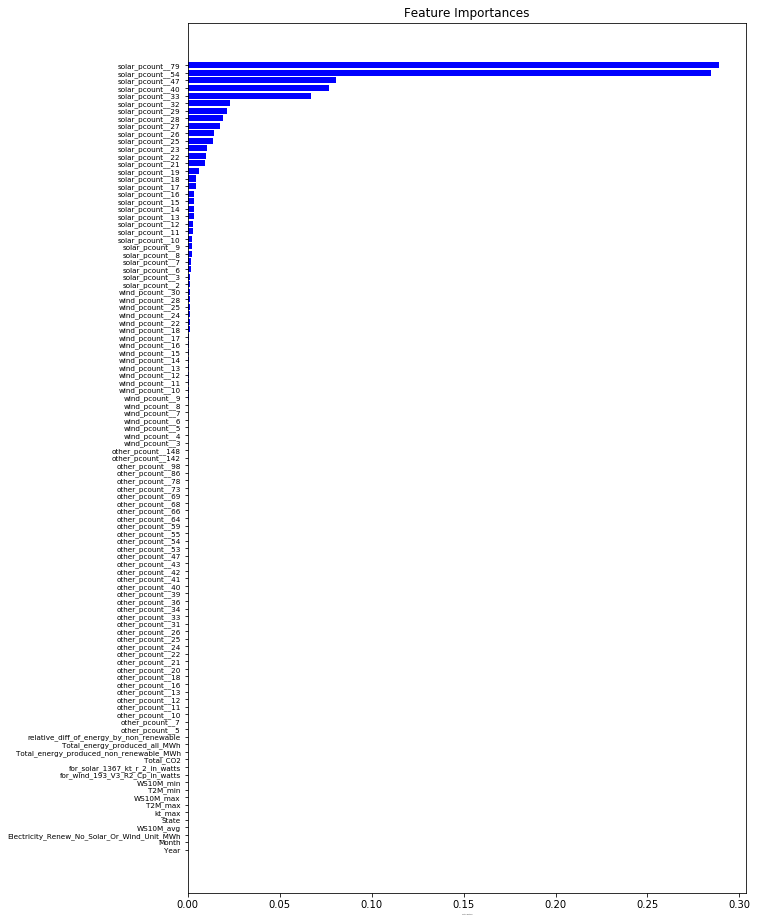

In [20]:
# Sorting importance matrix
features = X_train.columns
importances = regr.feature_importances_
indices = np.argsort(importances)

# adjusting the ploting area and aesthetics
import matplotlib as mpl
label_size = 7.25
mpl.rcParams['ytick.labelsize'] = label_size 
f, ax = plt.subplots(figsize=(10, 16))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance', fontsize = 5)
plt.xlabel('Relative Importance', fontsize = 1)
plt.show()

# End of Notebook!